In [195]:
import numpy as np
from scipy import sparse 
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd
from datetime import date, timedelta
import time
random.seed(42)

In [196]:
edges = np.load("edges.npz", allow_pickle=True)["arr_0"]

In [197]:
edges, len(edges)

(array([[ 8124,  5921, 15006],
        [31909, 53838, 14432],
        [31894, 53838, 14432],
        ...,
        [16787, 39834, 19119],
        [29958, 39834, 19119],
        [29958, 16787, 19119]]),
 1291378)

In [198]:
degree_count = {}

for v1, v2, _ in edges:
    degree_count[v1] = degree_count.get(v1, 0) + 1
    degree_count[v2] = degree_count.get(v2, 0) + 1

# Analysis

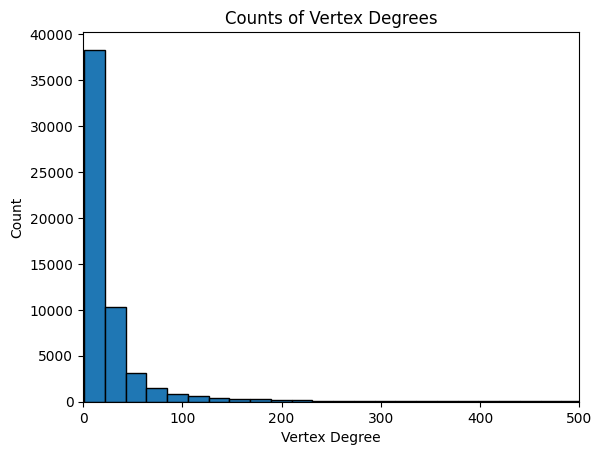

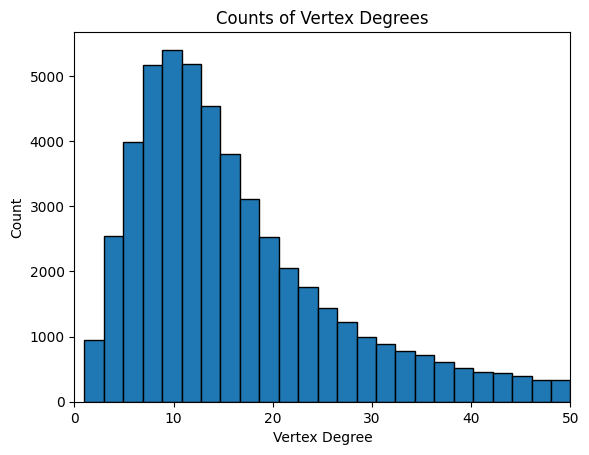

In [199]:
data = degree_count.values()
n_bins = int(np.floor(np.sqrt(len(data))))
plt.hist(data, bins=n_bins*10, edgecolor='black')

#plt.yscale('log')
plt.title('Counts of Vertex Degrees')
plt.xlabel('Vertex Degree')
plt.ylabel('Count')
plt.xlim(0, 500)
plt.show()

X_LIM = 50
data = [d for d in data if d <= 50]
n_bins = int(np.floor(np.sqrt(len(data))))
plt.hist(data, bins=25, edgecolor='black')
#plt.yscale('log')
plt.title('Counts of Vertex Degrees')
plt.xlabel('Vertex Degree')
plt.ylabel('Count')
plt.xlim(0, 50)
plt.show()

In [200]:
origin = date(1970, 1, 1)
years = [(origin + timedelta(days=int(days))).year for _, _, days in edges]

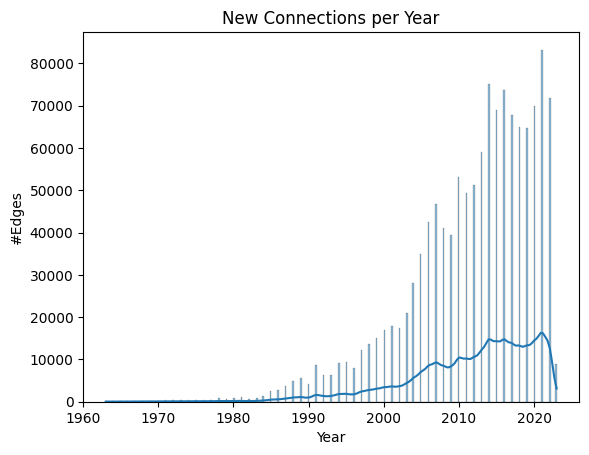

In [201]:
import seaborn as sns
sns.histplot(years, kde=True)
plt.xlabel('Year')
plt.ylabel('#Edges')
plt.title("New Connections per Year")

# Display the plot
plt.show()

In [202]:
def build_adj_matrix(edge_list):
    """Build a symmetric adjacency matrix from edge list."""
    EDGE_WEIGHT = np.ones(len(edge_list) * 2)  # each connection weights the same

    row_ind = np.concatenate((edge_list[:, 0], edge_list[:, 1]))
    col_ind = np.concatenate((edge_list[:, 1], edge_list[:, 0]))

    return sparse.csr_matrix(
        (
            EDGE_WEIGHT,
            (row_ind, col_ind),
        ),
        shape=(NUM_OF_VERTICES, NUM_OF_VERTICES),
        dtype=int
    )

NUM_OF_VERTICES = 59726 # number of concepts
ADJ_MAT = build_adj_matrix(edges)

G = nx.from_scipy_sparse_array(
    ADJ_MAT,
    parallel_edges=True,
    create_using=nx.MultiGraph
)

# Concepts

Filter: 
- Occurence >= 3
- Words >= 3

Element-specific:
- No single elements (i.e. Na)
- No duplicates (i.e. IIINV, CH3COONa, Ga2O3Gd2O3)

In [203]:
lookup = pd.read_csv("lookup.csv")

def transform(vs):
    return [lookup.loc[index]["concept"] for index in vs]

pd.set_option('display.max_columns', None) # no ... in listing
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
lookup.sort_values('count', ascending=False)[["concept", "count"]].head(250)

,concept,count
46020,scanning electron microscopy,12739
54032,transmission electron microscopy,10162
5268,SiC,6402
45991,scanning electron microscope,4115
5921,TiO2,4085
349,Al2O3,3988
5349,SiO2,3749
6442,ZnO,3706
57026,x-ray photoelectron spectroscopy,3307
36773,molecular dynamic simulation,3161


# Vertices

In [204]:
sorted_pairs = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)
sorted_pairs[:10]
[(transform([vertex])[0],count) for vertex,count in sorted_pairs]

[('scanning electron microscopy', 49997),
 ('transmission electron microscopy', 39250),
 ('SiC', 21423),
 ('Al2O3', 16233),
 ('TiO2', 16218),
 ('scanning electron microscope', 15376),
 ('SiO2', 14919),
 ('ZnO', 14027),
 ('x-ray photoelectron spectroscopy', 13965),
 ('fourier transform infrared spectroscopy', 9824),
 ('atomic force microscopy', 9772),
 ('GaN', 9411),
 ('density functional theory', 8653),
 ('differential scanning calorimetry', 8474),
 ('HSiC', 8412),
 ('molecular dynamic simulation', 6836),
 ('transmission electron microscope', 6357),
 ('chemical vapor deposition', 6226),
 ('finite element method', 6050),
 ('TiC', 6015),
 ('x-ray diffraction analysis', 5832),
 ('GaAs', 5669),
 ('NaCl', 5516),
 ('CO2', 5454),
 ('ultimate tensile strength', 5320),
 ('ZrO2', 5134),
 ('Ti6Al4V', 5024),
 ('AlN', 5002),
 ('CV', 4964),
 ('electron backscatter diffraction', 4927),
 ('finite element analysis', 4688),
 ('MgO', 4432),
 ('molecular beam epitaxy', 4403),
 ('TiN', 4401),
 ('electroche

# Communities

In [207]:
partition = nx.community.louvain_communities(G, resolution=15, threshold=1e-7)
densly_connected = [vs for vs in partition if len(vs) > 1]

print("Amount Communities", len(densly_connected))
[transform(vs) for vs in densly_connected]

Amount Communities 542


[['mean field approach',
  'phase transformation stability',
  'anisotropic plastic deformation',
  'dynamic carbon partitioning',
  'ISO16630',
  'utile tensile strength',
  '22mnb5 boron steel',
  'ISO6892',
  'local hydrogen concentration',
  'micro digital image correlation',
  'advanced high strength bainitic steel',
  'advanced high strength steel',
  'advanced high strength steels',
  'advanced high-strength steel',
  'phase-specific mechanical property',
  'friction stir forming',
  'high strain region',
  'hot forming process',
  'high strength bainitic steel',
  'continuous yielding behavior',
  'continuously cooled steel',
  'deformation at room temperature',
  'electron back-scattered diffraction analysis',
  'high strength steel',
  'high strength steel sheet',
  'hot press forming',
  'high strength trip steel',
  'weld line location',
  'weld line movement',
  'bainite start temperature',
  'bainite transformation kinetic',
  'deformation induced martensitic transformati

# Highly Connected Vertex Pairs

In [206]:
edge_counts = Counter(list(G.edges()))
filtered_edges = {tuple(transform(edge)):count for edge, count in edge_counts.most_common() if count > 10}
filtered_edges

{('scanning electron microscopy', 'transmission electron microscopy'): 2437,
 ('HSiC', 'SiC'): 1136,
 ('fourier transform infrared spectroscopy',
  'scanning electron microscopy'): 797,
 ('scanning electron microscopy', 'x-ray photoelectron spectroscopy'): 612,
 ('atomic force microscopy', 'scanning electron microscopy'): 606,
 ('AlGaN', 'GaN'): 578,
 ('SiC', 'SiO2'): 502,
 ('Al2O3', 'SiO2'): 499,
 ('differential scanning calorimetry', 'scanning electron microscopy'): 492,
 ('TiO2', 'scanning electron microscopy'): 487,
 ('scanning electron microscope', 'transmission electron microscope'): 469,
 ('FSW', 'friction stir welding'): 445,
 ('SBF', 'simulated body fluid'): 444,
 ('transmission electron microscopy', 'x-ray photoelectron spectroscopy'): 433,
 ('differential scanning calorimetry',
  'transmission electron microscopy'): 432,
 ('ZnO', 'scanning electron microscopy'): 430,
 ('energy dispersive spectroscopy', 'scanning electron microscopy'): 400,
 ('energy dispersive x-ray spectros